<center>

*******************************************************************************************
<font size="4">
Rank-correlation between annotated and computed synchronisation &nbsp; &nbsp; <br>
</font>

##### 4 November 2025

##### Juan Ignacio Mendoza Garay

*******************************************************************************************

</center>

##### INFORMATION:

* This program demonstrates the `PipeLine` class with filter and dimensional reduction as one step, and correlating the syncrhonisation scores with other data.

* Tested with:
    * Python 3.11
    * Windows 11
>
* Instructions:
    * Edit the values indicated with an arrow like this: <---

*******************************************************************************************

In [1]:
import sys
import numpy as np

sc_path = '../src'
sys.path.append(sc_path)
import syncoord as sc

***
### Declare paths and parameters

In [2]:
extfunc_path = 'C:/MyTemp/Matlab'  # <--- folder with external Matlab functions
gxwt_path = sc_path                # <--- folder with gxwt Matlab function
# Matlab functions only for GXWT. If GXWT won't be used, these variables won't be used either.

fig_path = None                    # <--- folder to save figures (None to don't save figures)

***
### Generate synthetic data

#### Signals

index; key; Name; duration (s):
  0; 0; Test Data; 0:16.0


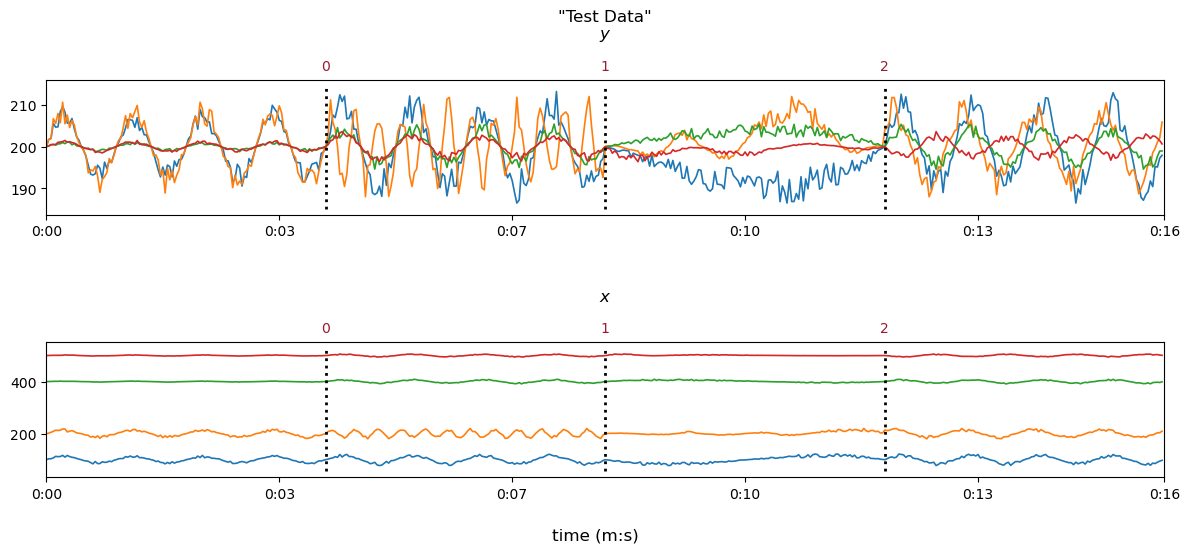

In [3]:
base_freq = 1     # <--- baseline frequency (Hz)
shuffseed = None  # <--- None = don't shuffle sections, int = shuffle sections
noise_fac = 0.5   # <--- noise strength for sections 0, 1, 3

testdata_vars = sc.utils.init_testdatavars(seed=1)
testdata_vars['point_vars'][[0,1,3],...,0] = base_freq
testdata_vars['point_vars'][1,1,...,0] = base_freq * 3
testdata_vars['point_vars'][...,5] = noise_fac
testdata_vars['point_vars'][2,...,5] = 0.5 # noise strength for section 2
if shuffseed is not None:
    rangen = np.random.default_rng(seed=shuffseed)
    rangen.shuffle(testdata_vars['point_vars'])
test_data_1 = sc.ptdata.load( testdata_vars, print_info=True )
test_data_1.visualise( vscale=1.2, dlattr='1.2' )

Unshuffled sections:
>0. All synchronised at baseline frequency, but signals 0 and 1 have higher amplitude.
>1. As in section 0, but signal 1 has triple the baseline frequency.
>2. Random oscillation.
>3. All have baseline frequency, but with constant phase differences: 1/8 cycle for signals 0 and 1; 1/2 cycle (*out of phase*) for signals 2 and 3.

Also each signal has distinct random noise.

#### Annotated synchronisation rank
The annotated rank will be correlated with the syncrhonisation scores.

In [4]:
# annot_sync = (3, 2, 0, 1)
annot_sync = (3, 2, 0, 3)

***
### Data pipeline

In [5]:
# Input ............................................................................................
pline = sc.PipeLine(test_data_1, matlab=[extfunc_path, gxwt_path])


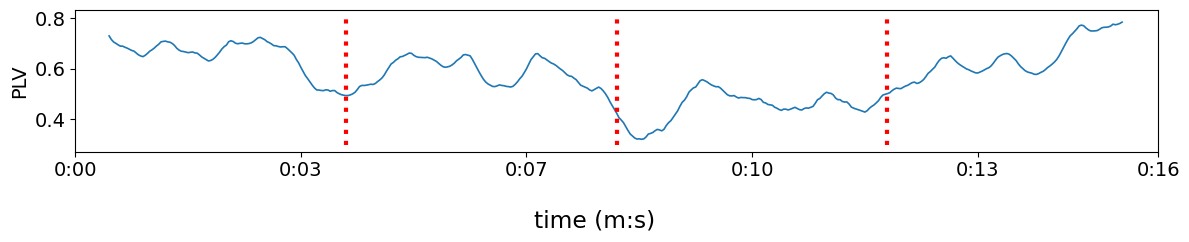

sections' means = [0.683, 0.603, 0.482, 0.638]
Tau = 0.913
p value = 0.071


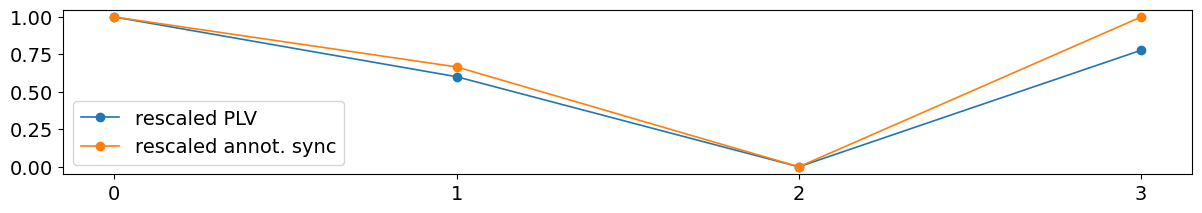

In [6]:
# Reduce to 1 dimension per point ..................................................................
red1D_par = { 'method' : 'norms',             # <--- 'norms', 'speed', 'x', 'y', 'z'
              'dim' : 2 }                     # <--- dimensions (only for 'norms' or 'speed')

# Phase ............................................................................................
phase_par = { 'method' : 'FFT' }              # <--- method for phase angles: 'peaks' or 'FFT'
phase_par['fft_freq'] = [1,10]                # <--- frequency or [min, max] frequencies (Hz)
# phase_par['fft_freq'] = 1                     # <--- frequency or [min, max] frequencies (Hz)
phase_par['window_hop'] = None                # <--- FFT window's hop (seconds)
# phase_par['window_hop'] = 5/30                # <--- FFT window's hop (seconds)
# phase_par['vis'] = True

# Synchronisation ..................................................................................
sync_par = { 'method' : 'PLV' }                 # <--- 'r', 'PLV', 'WCT', 'GXWT'
sync_par['windows'] = 1
# sync_par['windows'] = 'sections'                # <--- PLV sliding window (seconds) or 'sections'
# sync_par['sec_margins'] = 'useprev'             # <--- PLV sections' margins: 'useprev' or None
# sync_par['visint'] = { 'vlattr' : 'w:3f'}     # <--- visualise sync's intermediate steps
sync_par['vis'] = True     # <--- visualise sync

# Statistics .......................................................................................
stats_par = { 'func' : ['secstats','corr'] }  # <--- 'secstats', 'corr' or both in list
stats_par['margins'] = 'useprev'              # <--- margins of sections
stats_par['cont'] = False                     # <--- if 'secstats' XOR 'corr': continuous result
stats_par['arr'] = annot_sync                 # <--- if 'corr': array to correlate sync with
stats_par['arrlbl'] = 'annot. sync'           # <--- if 'corr': array's label
stats_par['vis'] = { 'printd' : True,         # <--- visualise statistics
                     'vscale' : 0.7,
                      'merge' : True }

# PIPELINE =========================================================================================
stepar = { 'filt':None, 'red1D':red1D_par, 'phase':phase_par, 'sync':sync_par, 'stats':stats_par }
gvis = { 'figtitle':None, 'fontsize':1.4, 'sptitle':False, 'snumpar':{'colour':False},
         'dlattr':'1.2', 'savepath':fig_path, 'pathfolder':True }
result = pline.run( stepar, gvis=gvis )
